In [37]:
import math
import matplotlib.pyplot as plt
import random as rnd

In [87]:
class Agent:
    def __init__(self,cell):
        self.pos = cell
        cell.occupants.append(self)
        
    def diffuse(self):
        self.pos =  self.pos.move(self)

In [147]:
class Cell:
    def __init__(self,pos):
        self.pos=pos
        self.occupants = []
        self.neighbours=[self,self,self]
    
    def move(self,agent):
        to = rnd.randint(0,2)
        if rnd.random()<((abs(self.pos-50)/8)/50):
            if self.pos-50<0:
                to = 2
            else:
                to = 0
        if to !=1:
            self.occupants.remove(agent)
            self.neighbours[to].occupants.append(agent)
            return self.neighbours[to]
        return self
    

In [148]:
class World:
    def __init__(self,size,agents):
        cells = [Cell(x) for x in range(size)]
        for i in range(1,size-1):
            cells[i].neighbours[0]=(cells[i-1])
            cells[i].neighbours[1]=(cells[i])
            cells[i].neighbours[2]=(cells[i+1])
        self.cells = cells
        self.agents=[Agent(cells[math.floor(size/2)]) for _ in range(agents)]
        
    def iterate(self):
        for  a in self.agents:
            a.diffuse()
            

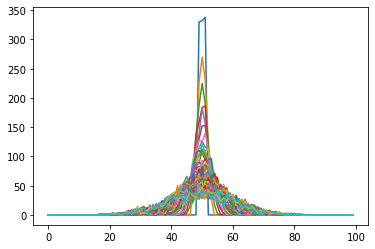

In [149]:
world = World(100,1000)
for i in range(300):
    world.iterate()
    if i% 2==0:
        plt.plot([len(cell.occupants) for cell in world.cells])
plt.show()

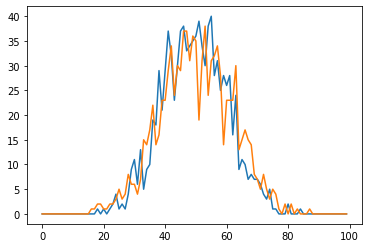

In [150]:
#plt.hist([len(cell.occupants) for cell in world.cells])
plt.plot([len(cell.occupants) for cell in world.cells])
for i in range(300):
    world.iterate()
plt.plot([len(cell.occupants) for cell in world.cells])
plt.show()

In [151]:
from scipy import stats
k2, p = stats.normaltest([len(cell.occupants) for cell in world.cells])

In [152]:
alpha = 1e-3
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


In [146]:
p

1.751390281006691e-07